# Esercitazione 1


In questa esercitazione vogliamo approcciare i metodi monte-carlo attraverso semplici esempi utilizzando un generatore di numeri psuedo-casuali.


## Esercizio 1.1

Sfruttiamo il generatore di numeri pseudocasauli, in combinazione col metodo a blocchi, per verificare la convergenza di una media e della deviazione standard della media ai loro valori analitici e utilizzando il test del $\chi^2$ per convalidare che i numeri pseudocasuali siano estratti da una distribuzione realmente uniforme.


### 1. Andamento di una Media

Andiamo a valure se l'integrale $$\langle r \rangle = \int_0^1 r dr$$ converge al suo valore analitico, pari a $\frac{1}{2}$, utilizzando un numero di lanci pari a $10^5$ suddiviso in 100 blocchi e generando valori di r distribuiti uniformemente in $[0,1)$.

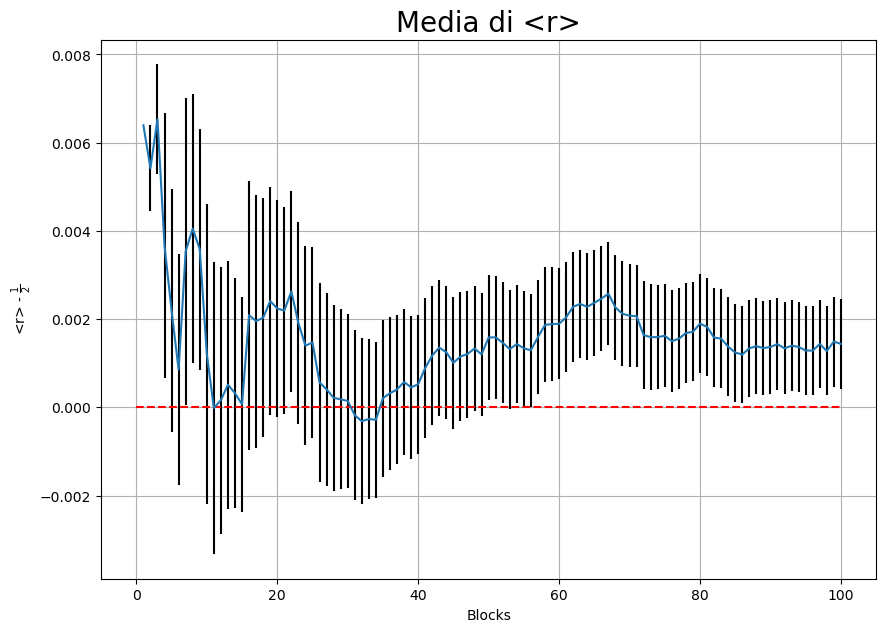

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

N =100
x = np.arange(N)+1     # [1,2,...,N], arange e basta genera da 0 a N-1
average, error = np.loadtxt("es1.1/meanresults.out", usecols=(0, 1), unpack=True, delimiter=' ')
plt.figure(figsize=(10,7))
plt.errorbar(x,average-0.5,yerr=error, ecolor='black')
plt.title('Media di <r>', fontsize=20)
plt.grid(True)
plt.hlines(0, 0, 100, colors='r', linestyles='dashed')
plt.xlabel('Blocks', fontsize=10)
plt.ylabel(r'<r> - $\frac{1}{2}$', fontsize=10)

plt.show()

    
Riportiamo la media e il suo errore calcolato al 100esimo blocco, quindi le nostre migliori approssimazioni, e le confrontiamo coi valori attesi

In [3]:
print ('La migliore approssimazione della media di <r> e`' + str(average[99]) + ' +- ' + str(error[99]))

La migliore approssimazione della media di <r> e`0.501438 +- 0.00101189


Possiamo, percio', osservare come il valore atteso analitico pari a 0.5 sia entro una sigma e mezzo dal valore ottenuto "sperimentalmente".

### 2. Andamento della Deviazione standard della Media

Stimiamo ora l'andamento della deviazione standard della media, definita come $\sigma^2 = \int_0^1 (r-1/2)^2 dr$, verificando che converga a valore analitico di 1/12. Grazie alla definizione possiamo, inoltre, stimare la sua incertezza calcolando la deviazione standard della media di <$(r-1/2)^2$ >.
Come prima, sfruttiamo il metodo a blocchi utilizzando un numero di lanci pari a  $10^5$ suddiviso in 100 blocchi e generando valori di r distribuiti uniformemente in $[0,1)$. 

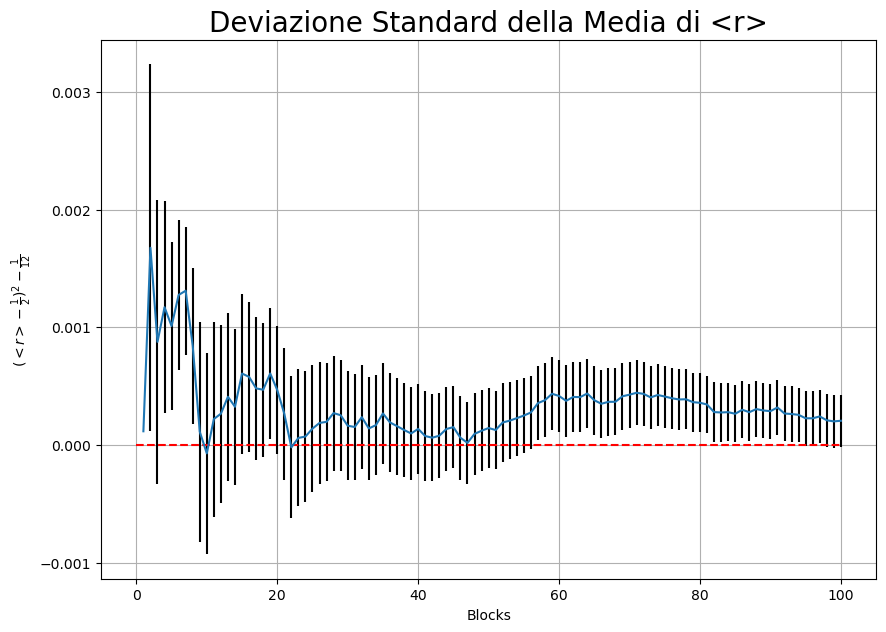

In [4]:
sigma, sigma_error = np.loadtxt("es1.1/sigmaresults.out", usecols=(0, 1), unpack=True, delimiter=' ')
plt.figure(figsize=(10,7))
plt.errorbar(x,sigma-1/12,yerr=sigma_error, ecolor='black')
plt.title('Deviazione Standard della Media di <r>', fontsize=20)
plt.grid(True)
plt.hlines(0, 0, 100, colors='r', linestyles='dashed')
plt.xlabel('Blocks', fontsize=10)
plt.ylabel(r'$(<r>-\frac{1}{2})^2 - \frac{1}{12}$', fontsize=10) #r per scrivere il quadrato in latex

plt.show()

Riportiamo il miglior valore della deviazione standard da noi trovato.

In [5]:
print ('La migliore approssimazione della dev std della media di <r> e`' + str(sigma[99]) + ' +- ' + 
       str(sigma_error[99]))

La migliore approssimazione della dev std della media di <r> e`0.0835406 +- 0.000222892


Osserviamo che il nostro valore e' distante poco meno di una sigma dal valore atteso pari a $\frac{1}{12}$ = 0.08333.

### 3. Test statistico di Pearson

I test portati avanti fin'ora si basano sull'ipotesi fondamentale che i numeri estratti dal generatore di numeri pseudo-casuali siano veramente distribuiti uniformemente in $[0,1)$. 
Il test statistico di Pearson del $\chi^2$ ci permette di verificare se questa ipotesi e' veritiera. Dividiamo, quindi, l'intervallo $[0,1)$ in M=100 sotto-intervalli, in ognuno facciamo n=$10^4$ estrazioni e calcoliamo il $\chi^2$, nel nostro caso, attraverso: 

$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$ 

con $n_i$ sostanzialmente un istogramma che divide l'intervallo $[0,1)$ in 100 bin e ci dice quante delle $10^4$ estrazioni cadono nel k-esimo bin ossia in $[k*0.01, (k+1)*0.01)$.
Plottiamo poi $\chi^2$ calcolato per l'i-esimo sotto-intervallo rispetto all'intervallo corrispondente.

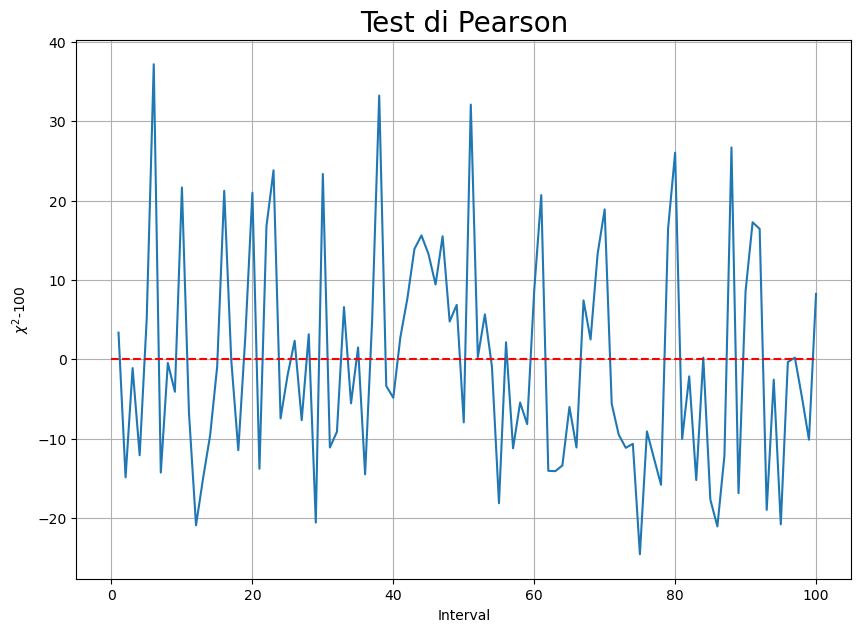

In [6]:
chi_2= np.loadtxt("es1.1/chiresults.out", usecols=(0), unpack=True)
plt.figure(figsize=(10,7))
plt.plot(x,chi_2-100)
plt.title('Test di Pearson', fontsize=20)
plt.grid(True)
plt.hlines(0, 0, 100, colors='r', linestyles='dashed')
plt.xlabel('Interval', fontsize=10)
plt.ylabel('$\chi^2$-100', fontsize=10)

plt.show()

Possiamo ora calcolare la media dei cento $\chi^2$ e valutare se converga al valore atteso pari a 100, i.e. il numero di sotto-intervalli.


In [7]:
print('Il Chi^2 medio e` ' + str(np.mean(chi_2)) + ' +- ' + str(np.var(chi_2)))

Il Chi^2 medio e` 99.76379999999997 +- 189.41751756000002


Possiamo quindi vedere che il valore atteso e sperimentale sono compatibili, allo stesso modo della varianza che correttamente è pari a 2 volte il numero di sotto-intervalli totali.
Per concludere, possiamo effettuare anche un istogramma dei cento $\chi^2$ ed osservare come si distribuiscono. 

<function matplotlib.pyplot.show(close=None, block=None)>

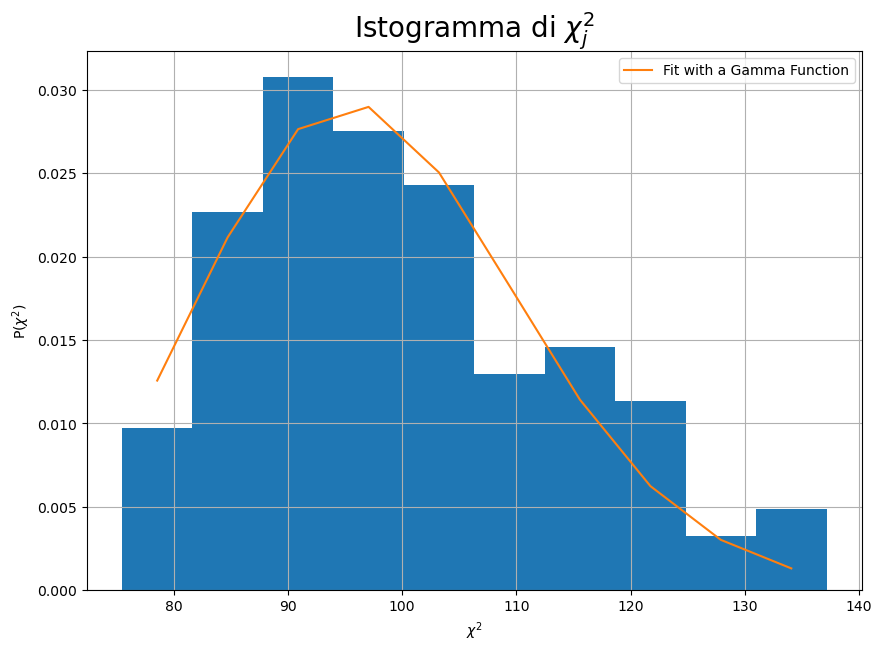

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

chi_2= np.loadtxt("es1.1/chiresults.out", usecols=(0), unpack=True)
plt.figure(figsize=(10,7))
n, bins, patches = plt.hist(chi_2, bins=10, density = 'true',histtype = 'stepfilled') 
#piu' abbasso i bin, piu la gamma funziona


def chiSquared (x, amplitude, k): #funziona ma è abbastanza gne
    return amplitude * np.exp(-x/2)* x**((k/2)-1)

#Calculate the center of each bin
bin_centers = (bins[1:] + bins[:-1])/2

# Fit the gamma PDF to the data NON FUNZIONA ANCORA
popt, pcov = curve_fit(chiSquared, bin_centers, n, p0=[0,100])
plt.plot(bin_centers, chiSquared(bin_centers, *popt), label='Fit with a Gamma Function')       
    
plt.title ("Istogramma di $\chi^2_j$", fontsize =20)
plt.grid(True)
plt.legend()
plt.ylabel ("P($\chi^2$)", fontsize =10)
plt.xlabel ("$\chi^2$", fontsize=10)

plt.show

Notiamo che non ha un andamento Gaussiano. Il $\chi^2$, infatti, è approssimato da una gaussiana solo quando il numero di gradi di libertà, nel nostro caso il numero di sotto-intervalli, è molto alto, altrimenti ha una più evidente gobba dalla parte sinistra che poi decresce all'aumentare del valore del $\chi^2$: ha, cioè, la forma di una Gamma.

## Esercizio 1.2

In questo esercizio vogliamo estendere il nostro generatore di numeri pseudocasuali e verificare la validità del Teorema del Limite Centrale, per il quale quando variabili casuali sono mediate tra loro durante l'estrazione le medie tendono a distribuirsi come una gaussiana, indipendentemente dalla distribuzione con cui sono estratte, ammesso che questa abbia varianza finita. \
Se, ad esempio, estraiamo una variabile casuale con distribuzione esponenziale e facciamo direttamente l'istogramma delle estrazioni, otterremo giustamente un esponenziale. Se estraiamo, invece, le variabili ed effettuiamo una media su una popolazione piu' o meno grande, all'aumentare della dimensione della popolazione, la distribuzione tendera' ad una gaussiana.

Innanitutto estendiamo il generatore di numeri pseudocasuali alla possibilita' di campionare variabili 
casuali distribuite secondo distribuzioni di probabilita' diverse da quella uniforme.
Utilizziamo il metodo dell'inverso della Funzione Cumulativa per estrarre valori di x che seguono due interessanti distribuzioni:
1. Distribuzione esponenziale $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$;
2. Distribuzione di Cauchy-Lorentz $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$.

Grazie al metodo dell'inverso della Funzione Cumulativa, se siamo capaci di calcolare la funzione cumulativa associata a p(x), calcolabile a partire da $p_x(x)=\frac{d}{dx}[F_x(x)]$, e di invertirla analiticamente, possiamo campionare la variabile x attraverso: 
$$x=F_x(y)^{-1}$$ 

con y una varibiale uniformemente distribuita in $[0,1)$.
Applicando questo metodo alla distribuzioni a cui siamo interessati troviamo che:
1. per una distribuzione esponenziale $x=-\frac{1}{\lambda}\ln(1-y)$ con $\lambda$ il tasso di decadimento;
2. per una distribuzione di Cauchy-Lorentz $x=\Gamma tan[\pi(y-\frac{1}{2})]$.

Per verificare graficamente che i risultati seguano le distribuzioni volute, costruiamo tre istogrammi ognuno contenente $10^4$ realizzazioni di $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ con $N=1, 2, 10, 100$ mentre $x_i$ una variabile casuale che segue una distribuzione uniforme in $[0,1)$, exponenziale con $\lambda=1$ e lorentziana con $\Gamma=1$.
Infine, nel caso N=100, fittiamo il dado standard e quello esponenziale con una Gaussiana e con una Lorentziana nel caso del dado di Cauchy-Lorentz.

<function matplotlib.pyplot.show(close=None, block=None)>

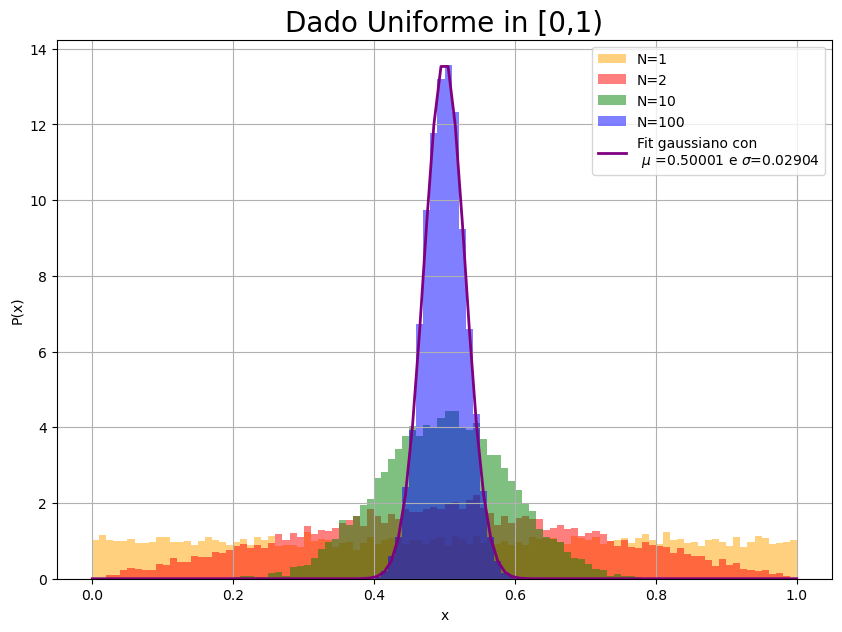

In [15]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import norm

N = [1, 2, 10, 100]
n_bin=100
colors = ['orange','red', 'green', 'blue']
labels = ["N=1", "N=2", "N=10", "N=100"]
plt.figure(figsize=(10,7))

for i in range(4):
    std_dice = np.loadtxt("es1.2/std_dice.out",max_rows = 10000, skiprows = i*10000 ,unpack = True)
    plt.hist(std_dice, n_bin, color = colors[i], density = 'true', label = labels[i], histtype = 'bar',
             range = (0,1), alpha=0.5) #density normalizza cosi che l'area sotto l'istogramma intera ad 1
#qui alpha=0.5 per rendere trasparente i vari istogrammi
    
#Fit gaussiano
mean_std, sigma_std = norm.fit(std_dice)
x_std = np.linspace(0, 1, n_bin)
fit_std = norm.pdf(x_std, mean_std, sigma_std) #se al posto di x mettessi std_dice cercherei di fittare ogni dato in ogni bin
plt.plot(x_std, fit_std, color = 'Purple', linewidth=2, label = 'Fit gaussiano con \n $\mu$ =' + str(round(mean_std,5)) +
         ' e $\sigma$=' + str(round(sigma_std,5)))
    
    
plt.title ("Dado Uniforme in [0,1)", fontsize =20)
plt.grid(True)
plt.legend()
plt.xlabel ("x", fontsize =10)
plt.ylabel ("P(x)", fontsize=10)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

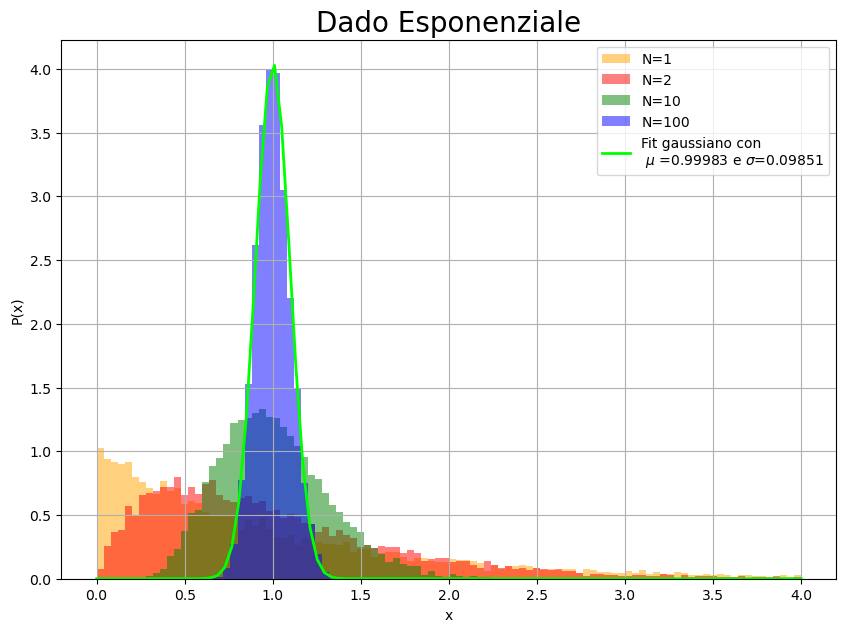

In [16]:
plt.figure(figsize=(10,7))

for i in range(4):
    exp_dice = np.loadtxt("es1.2/exp_dice.out",max_rows = 10000, skiprows = i*10000 ,unpack = True)
    plt.hist(exp_dice, n_bin, color = colors[i], density = 'true', label = labels[i], histtype = 'bar', 
             range = (0,4), alpha=0.5) #abbiamo dati anche oltre 4 ma per vedere meglio la parte 
                            #interessante ci reestringiamo in questa zona

#Fit gaussiano
mean_exp, sigma_exp = norm.fit(exp_dice) #cosi' calcolo i parametri del fit gaussiano sull'arrey exp_dice 
                                         # corrispondente a N=100 perche' e' l'ultimo quindi non e' stato sovrascritto
x_exp = np.linspace(0, 4, n_bin)
fit_exp = norm.pdf(x_exp, mean_exp, sigma_exp) #se al posto di x mettessi std_dice cercherei di fittare ogni dato in ogni bin
plt.plot(x_exp, fit_exp, color = 'lime', linewidth=2, label = 'Fit gaussiano con \n $\mu$ =' + 
         str(round(mean_exp,5)) + ' e $\sigma$=' + str(round(sigma_exp,5)))      
        
plt.title ("Dado Esponenziale", fontsize =20)
plt.grid(True)
plt.legend()
plt.xlabel ("x", fontsize =10)
plt.ylabel ("P(x)", fontsize=10)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

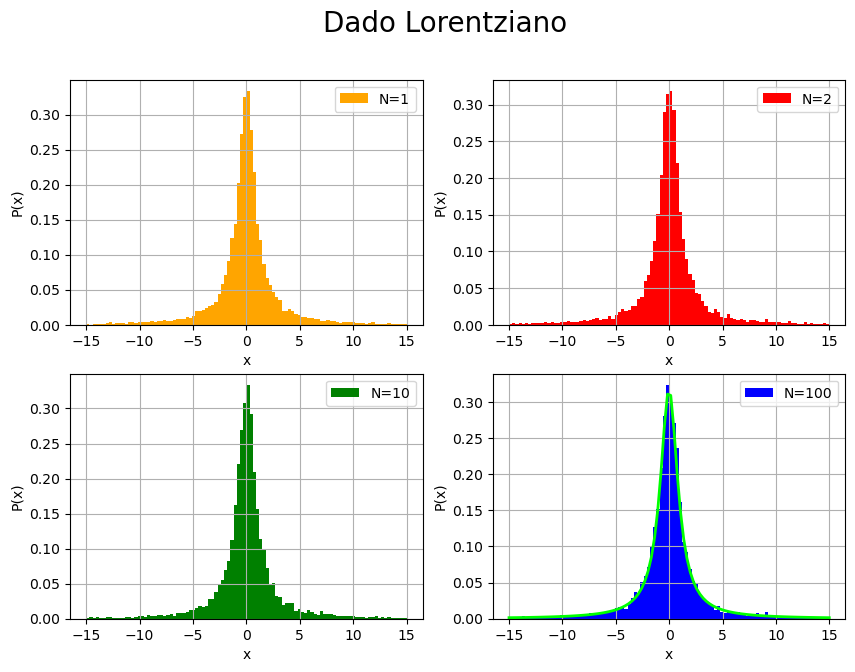

In [10]:
from scipy.stats import cauchy
plt.figure(figsize=(10,7))
#qui utilizziamo 4 subplot differenti perche' la distribuzione per N=100 copre le altre 

for i in range(4):
    lor_dice = np.loadtxt("es1.2/lor_dice.out",max_rows = 10000, skiprows = i*10000 ,unpack =True)
    plt.subplot(2, 2, i+1)
    plt.hist(lor_dice, n_bin, color = colors[i], density = 'true', label = labels[i], histtype = 'bar', range=(-15, 15)) 
    plt.grid(True)
    plt.legend()
    plt.xlabel ("x", fontsize =10)
    plt.ylabel ("P(x)", fontsize=10)

#Fit Lorentiano
mean_lor, gamma_lor = cauchy.fit(lor_dice) #il secondo momento di una lorentziana e' la gamma cioe' la width
x_lor = np.linspace(-15, 15, n_bin)
fit_lor = cauchy.pdf(x_lor, mean_lor, gamma_lor)
plt.plot(x_lor, fit_lor, color = 'lime', linewidth=2, label = 'Fit Lorentziano con \n $\mu$ =' + 
         str(round(mean_lor,5)) + ' e $\Gamma$=' + str(round(gamma_lor,5)))  
    
plt.suptitle ("Dado Lorentziano", fontsize =20)

plt.show

Nei primi due casi, dado uniforme ed esponenziale, è evidente la convergenza alla distribuzione normale.
Gli istogrammi per la distribuzone lorentziana, invece, rimangono sostanzialmente immutati al variare della grandezza di popolazione su cui stiamo mediando: questo risultato è compatibile con il Teorema del Limite Centrale il quale, infatti, vale solo sotto l'assunzione che la varianza della distribuzione di partenza sia finita mentre la Lorentziana ha varianza infinita perche' presenta valor medio nullo. Possiamo, inoltre, osservare come la distribuzione Lorentziana tenda a se stessa e, infatti, si tratta di una distribuzione stabile, proprio come la gaussiana. 

## Esercizio 1.3

Il primo uso documentato di un campionamento randomico per la risoluzione di un integrale risale alla fine del 1700. Nel 1777, infatti, il Conte di Buffon descrisse un particolare esperimento: se lanciamo casualmente un ago di lunghezza L su un piano orizzontale dove sono posizionate delle linee parallele e distanti tra loro di d, con d>L, e ripetiamo questo esperimento con molti aghi, possiamo estrarre la probabilita' che un ago intersechi una delle linee.
Il conte trovo' che questa probabilita' e' pari a $P=\frac{2L}{d\pi}$.
Nel 1820 Laplace suggeri'che questa idea poteva essere utilizzata per valutare empiricamente $\pi$: se infatti l'ago e' lanciato N volte e osserviamo che M di questi lanci cadono su una linea, allora 

$$\pi = \lim_{N \to \infty}\frac{2LN}{Md}$$

Riproponiamo l'esperimento utilizzando un numero totale di lanci pari a M=$10^6$ suddiviso pero' in 100 blocchi per utlizzare il metodo a blocchi. 

Per ricreare il lancio dell'ago abbiamo generato la sua cruna in una posizione casuale tra 0 e d, poi non potendo estrarre direttamente l'angolo rispetto ad x a cui la punta dell'ago cade, dato che utilizzeremmo il valore di $\pi$ stesso essendo $\theta\in[0,2\pi]$, generiamo due numeri casuali in $[-1, 1]$, richiediamo che siano all'interno del cerchio di raggio unitario, calcoliamo il coseno dell'angolo normalizzando la x estratta e con questa calcoliamo dove si trova la punta dell'ago secondo $x_{punta} = x_{cruna}+L\cos \theta$. \
Abbiamo, infine, verificato che l'ago cadesse o no sopra una delle due linee verticali posizioante a $x=0$ e $x=d$ ed calcolato il numero di casi in cui cio' avviene per utilizzare la formula sopra riportata.

Plottiamo, quindi, il valore medio di $\pi$ e l'incertezza ad esso associato in funzione del numero di blocchi.

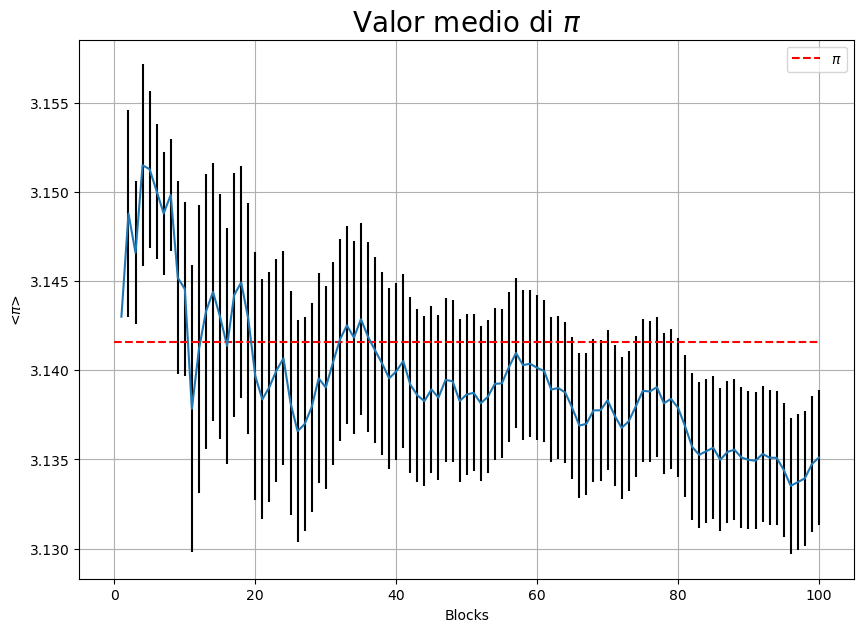

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

N =100
x = np.arange(N)+1     # [1,2,...,N], arange e basta genera da 0 a N-1
average, error = np.loadtxt("es1.3/pi_results.out", usecols=(0, 1), unpack=True, delimiter=' ')
plt.figure(figsize=(10,7))
plt.errorbar(x,average,yerr=error, ecolor='black')
plt.title('Valor medio di $\pi$', fontsize=20)
plt.grid(True)
plt.hlines(math.pi, 0, 100, colors='red', linestyles='dashed', label = "$\pi$")
plt.xlabel('Blocks', fontsize=10)
plt.ylabel('<$\pi$>', fontsize=10)
plt.legend()

plt.show()

Possiamo, infine, riportare la migliore approssimazione di $\pi$ da noi trovato col suo errore.

In [18]:
print ('La migliore approssimazione di Pi greco e`' + str(average[99]) + ' +- ' + 
       str(error[99]))

La migliore approssimazione di Pi greco e`3.13511 +- 0.00379197


Possiamo, dunque, osservare come l'algoritmo da noi implementato partendo dall'esperimento di Buffon e dalle considerazioni di Laplace stimi un $\pi$ che e' distante dal valore atteso circa una $\sigma$ e mezzo.